In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.limpieza_datos import (
    cargar_datos, eliminar_columnas)

In [2]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
import os
os.listdir()


['00_analisis_tattoo.ipynb']

Cargar el dataset principal del estudio de tatuajes

In [4]:
RAW_CSV = "../data/tattoo_studio_dataset.csv"

df = cargar_datos(RAW_CSV)
df.head()


,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3478163327,46,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,NaN,47647,UPI,3
1,3107420369,32,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1,42498,NaN,42498,Card,2
2,4181241943,25,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,NaN,19778,Cash,1
3,4051802512,38,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4,5478,NaN,5478,Cash,4
4,3958682846,36,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,Consultation Fee,33471,Card,1


rutas de entrada y salida de datos


In [5]:
df.head()



,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3478163327,46,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,NaN,47647,UPI,3
1,3107420369,32,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1,42498,NaN,42498,Card,2
2,4181241943,25,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,NaN,19778,Cash,1
3,4051802512,38,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4,5478,NaN,5478,Cash,4
4,3958682846,36,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,Consultation Fee,33471,Card,1


Mostrar rutas para verificar

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mobile_Number          2000 non-null   int64 
 1   Age                    2000 non-null   int64 
 2   Gender                 2000 non-null   object
 3   Appointment_Date       2000 non-null   object
 4   Day_of_Week            2000 non-null   object
 5   Session_Type           2000 non-null   object
 6   Tattoo_Size            2000 non-null   object
 7   Tattoo_Style           2000 non-null   object
 8   Artist_Name            2000 non-null   object
 9   Session_Hours          2000 non-null   int64 
 10  Final_Rate             2000 non-null   int64 
 11  Additional_Services    1012 non-null   object
 12  Total_Bill             2000 non-null   int64 
 13  Payment_Mode           2000 non-null   object
 14  Customer_Satisfaction  2000 non-null   int64 
dtypes: int64(6), object(9

In [7]:
# Tip rápido: info + nulos
df.info()
display(pd.DataFrame({
    "n_nulls": df.isna().sum(),
    "pct_nulls": (df.isna().mean()*100).round(2),
    "dtype": df.dtypes.astype(str)
}).sort_values("pct_nulls", ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mobile_Number          2000 non-null   int64 
 1   Age                    2000 non-null   int64 
 2   Gender                 2000 non-null   object
 3   Appointment_Date       2000 non-null   object
 4   Day_of_Week            2000 non-null   object
 5   Session_Type           2000 non-null   object
 6   Tattoo_Size            2000 non-null   object
 7   Tattoo_Style           2000 non-null   object
 8   Artist_Name            2000 non-null   object
 9   Session_Hours          2000 non-null   int64 
 10  Final_Rate             2000 non-null   int64 
 11  Additional_Services    1012 non-null   object
 12  Total_Bill             2000 non-null   int64 
 13  Payment_Mode           2000 non-null   object
 14  Customer_Satisfaction  2000 non-null   int64 
dtypes: int64(6), object(9

,n_nulls,pct_nulls,dtype
Additional_Services,988,49.4,object
Age,0,0.0,int64
Mobile_Number,0,0.0,int64
Appointment_Date,0,0.0,object
Day_of_Week,0,0.0,object
Session_Type,0,0.0,object
Gender,0,0.0,object
Tattoo_Size,0,0.0,object
Tattoo_Style,0,0.0,object
Session_Hours,0,0.0,int64


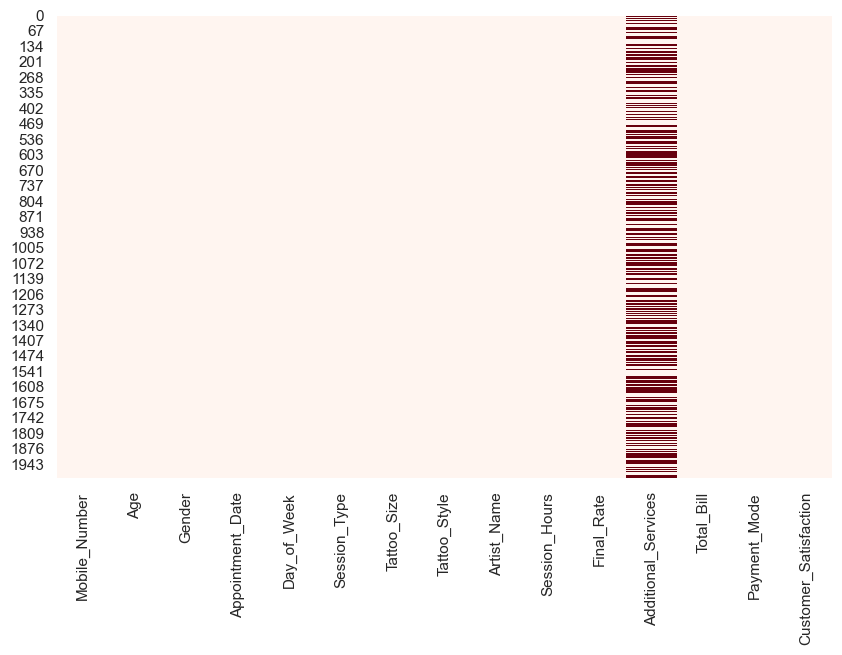

In [8]:
sns.heatmap(df.isna(), cbar=False, cmap="Reds")
plt.show()

CAMBIA por una columna real

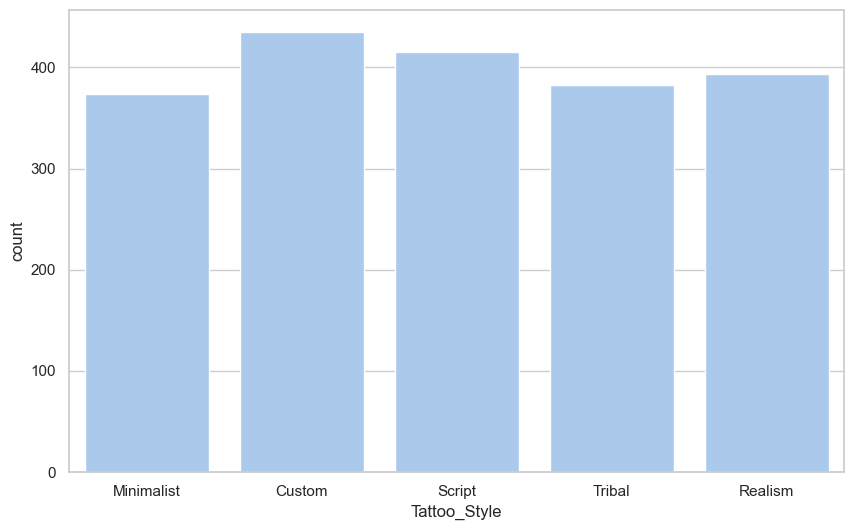

In [9]:
sns.countplot(x=df["Tattoo_Style"])
plt.show()


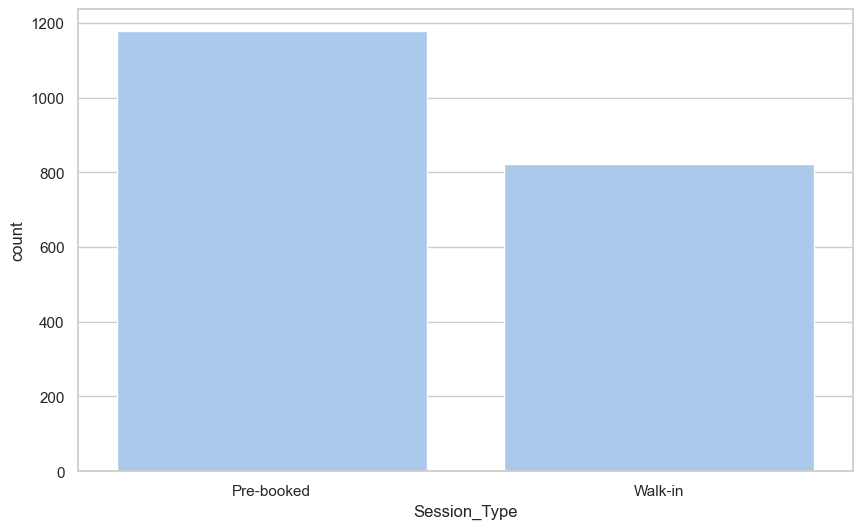

In [10]:
sns.countplot(x=df["Session_Type"])
plt.show()


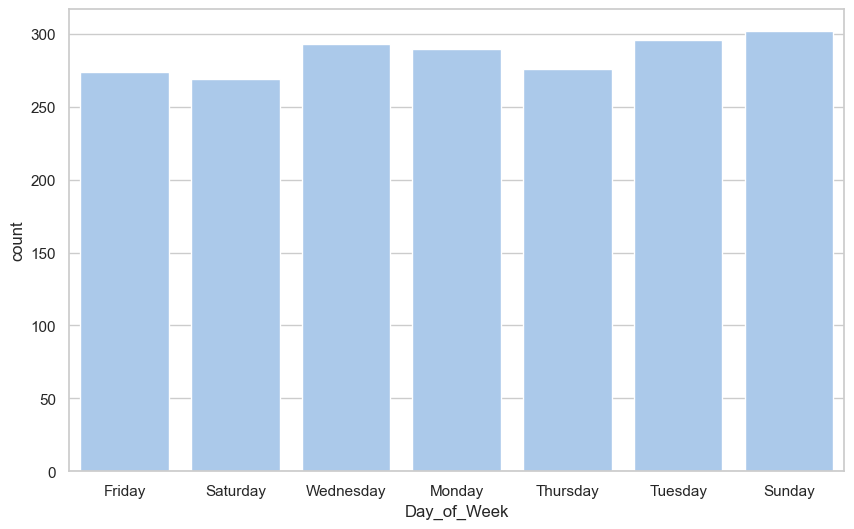

In [11]:
sns.countplot(x=df["Day_of_Week"])
plt.show()




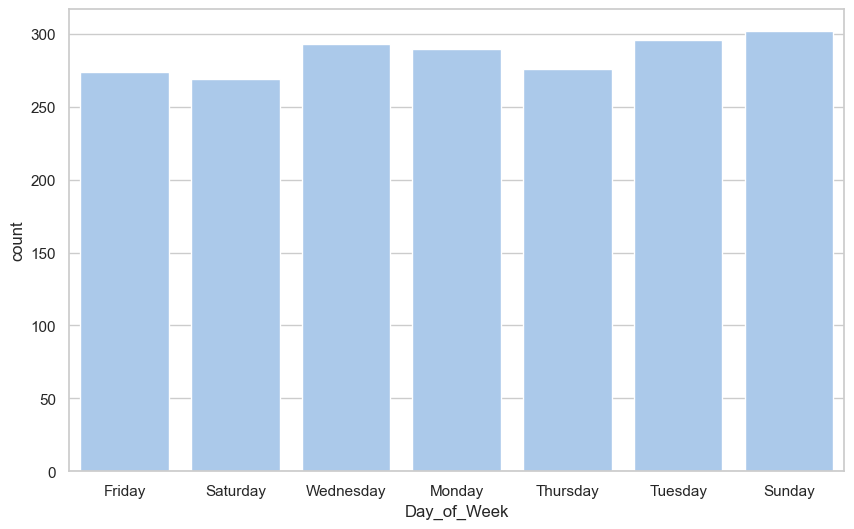

In [12]:
sns.countplot(x=df["Day_of_Week"])
plt.show()

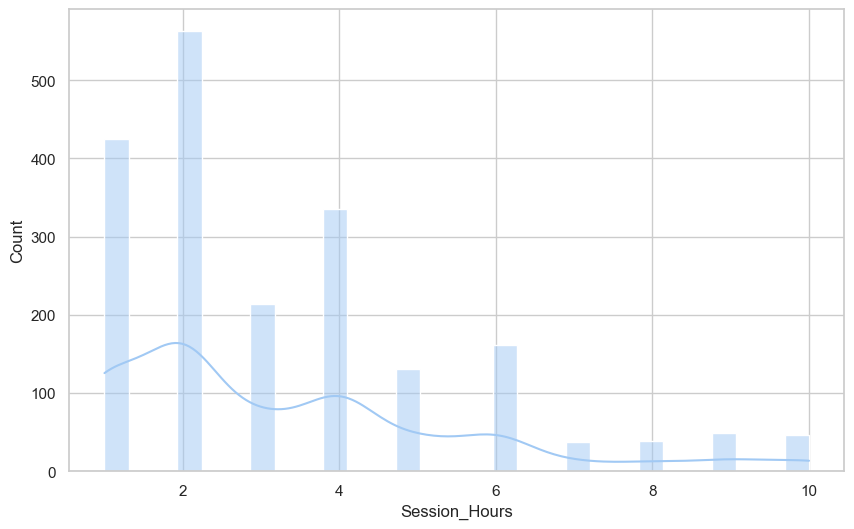

In [13]:
sns.histplot(df["Session_Hours"], kde=True)
plt.show()


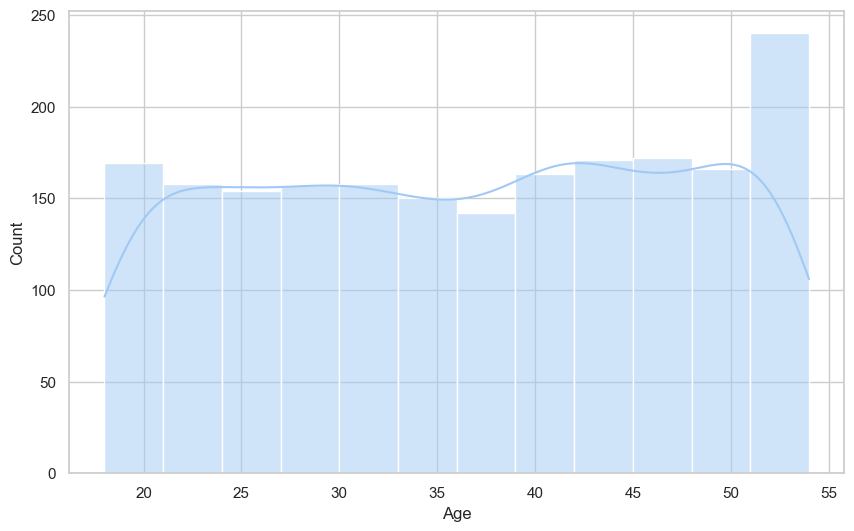

In [14]:
sns.histplot(df["Age"], kde=True)
plt.show()


In [15]:
df[df.isnull().any(axis=1)]

,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3478163327,46,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,NaN,47647,UPI,3
1,3107420369,32,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1,42498,NaN,42498,Card,2
2,4181241943,25,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,NaN,19778,Cash,1
3,4051802512,38,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4,5478,NaN,5478,Cash,4
6,3440213415,28,Other,2024-07-20,Saturday,Walk-in,Small,Realism,Artist C,1,2546,NaN,2546,Card,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,5376074389,31,Female,2024-10-01,Tuesday,Walk-in,Large,Tribal,Artist A,5,32741,NaN,32741,Cash,5
1993,4239534867,37,Male,2024-12-17,Tuesday,Pre-booked,Medium,Script,Artist D,4,9793,NaN,9793,UPI,5
1994,3315816454,35,Female,2024-08-31,Saturday,Walk-in,Small,Minimalist,Artist A,1,18581,NaN,18581,UPI,5
1995,4659355558,46,Female,2024-10-20,Sunday,Pre-booked,Small,Realism,Artist C,2,4836,NaN,4836,UPI,3


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mobile_Number          2000 non-null   int64 
 1   Age                    2000 non-null   int64 
 2   Gender                 2000 non-null   object
 3   Appointment_Date       2000 non-null   object
 4   Day_of_Week            2000 non-null   object
 5   Session_Type           2000 non-null   object
 6   Tattoo_Size            2000 non-null   object
 7   Tattoo_Style           2000 non-null   object
 8   Artist_Name            2000 non-null   object
 9   Session_Hours          2000 non-null   int64 
 10  Final_Rate             2000 non-null   int64 
 11  Additional_Services    1012 non-null   object
 12  Total_Bill             2000 non-null   int64 
 13  Payment_Mode           2000 non-null   object
 14  Customer_Satisfaction  2000 non-null   int64 
dtypes: int64(6), object(9

In [18]:
df_drop_cols = df.dropna(axis=1)
df_drop_cols.head()


,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3478163327,46,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,47647,UPI,3
1,3107420369,32,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1,42498,42498,Card,2
2,4181241943,25,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,19778,Cash,1
3,4051802512,38,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4,5478,5478,Cash,4
4,3958682846,36,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,33471,Card,1


In [19]:
df = eliminar_columnas(df, ["Mobile_Number", "Additional_Services", "Total_Bill", "Payment_Mode", "Appointment_Date"])
df.head()


,Age,Gender,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Customer_Satisfaction
0,46,Female,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,3
1,32,Male,Saturday,Walk-in,Small,Custom,Artist C,1,42498,2
2,25,Male,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,1
3,38,Female,Friday,Pre-booked,Medium,Script,Artist D,4,5478,4
4,36,Male,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,1


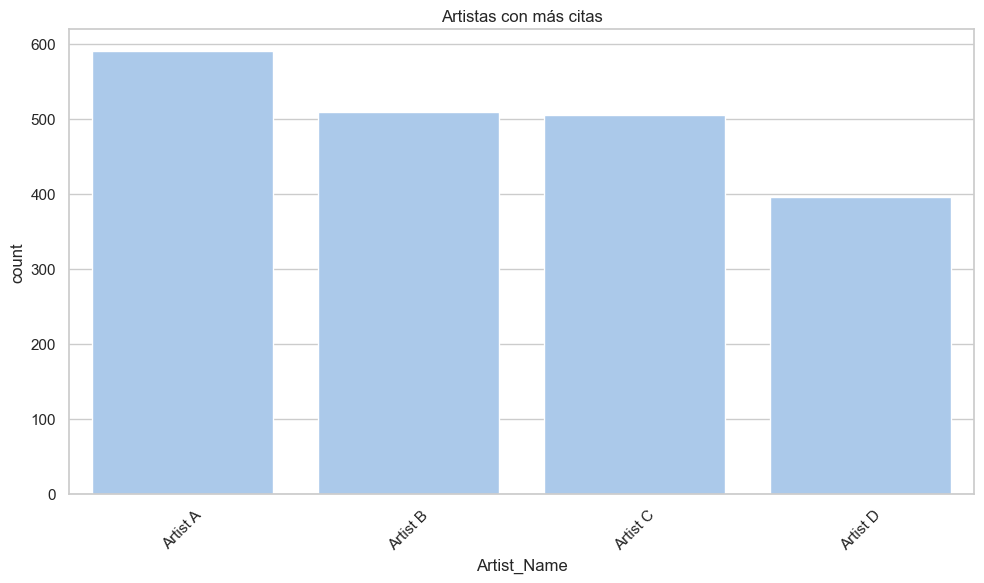

In [20]:
plt.figure()
sns.countplot(data=df, x="Artist_Name", order=df["Artist_Name"].value_counts().index)
plt.title("Artistas con más citas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


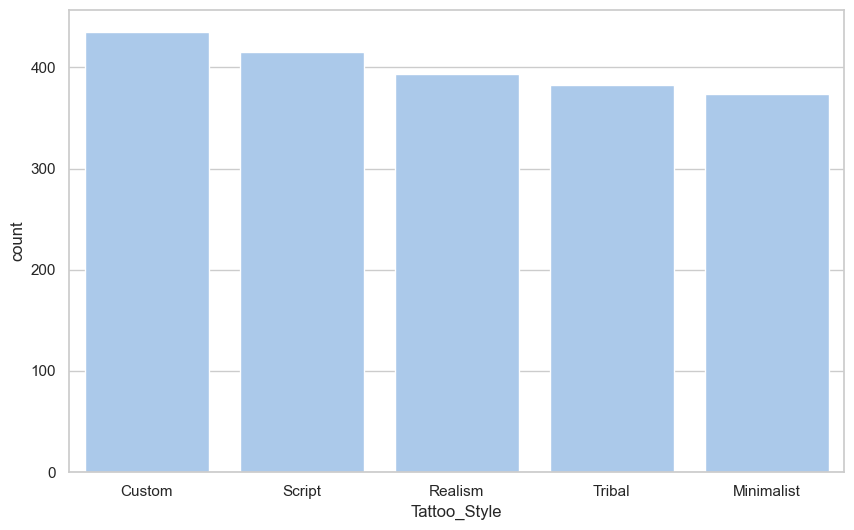

In [21]:
plt.figure()
sns.countplot(data=df, x="Tattoo_Style", order=df["Tattoo_Style"].value_counts().index)
plt.show()


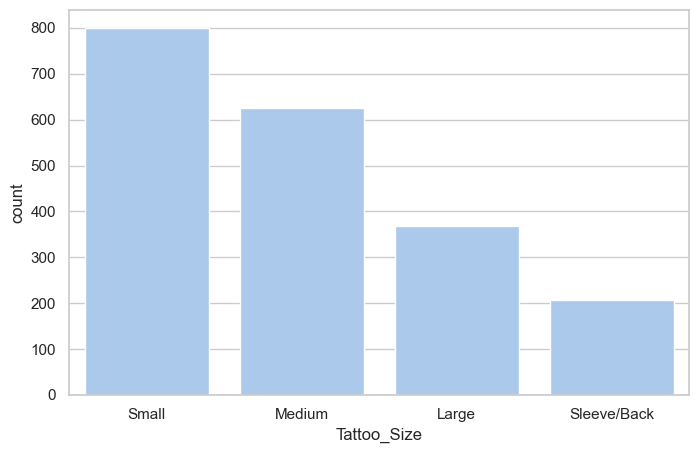

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Tattoo_Size", order=df["Tattoo_Size"].value_counts().index)
plt.show()


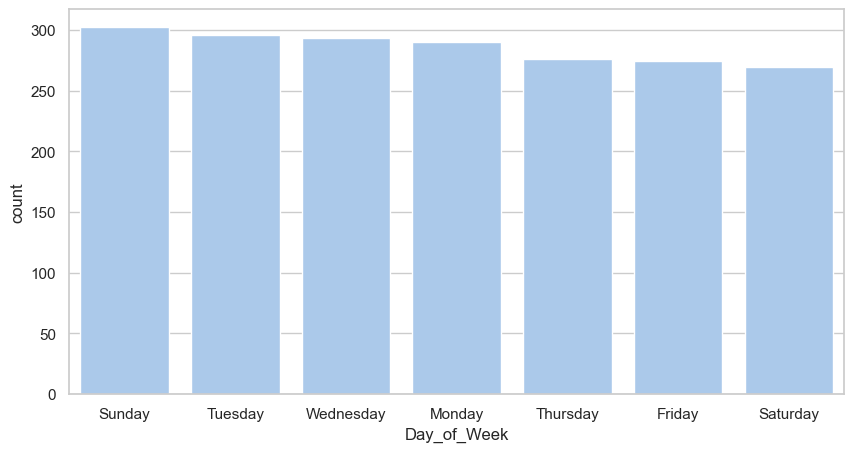

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Day_of_Week", order=df["Day_of_Week"].value_counts().index)
plt.show()


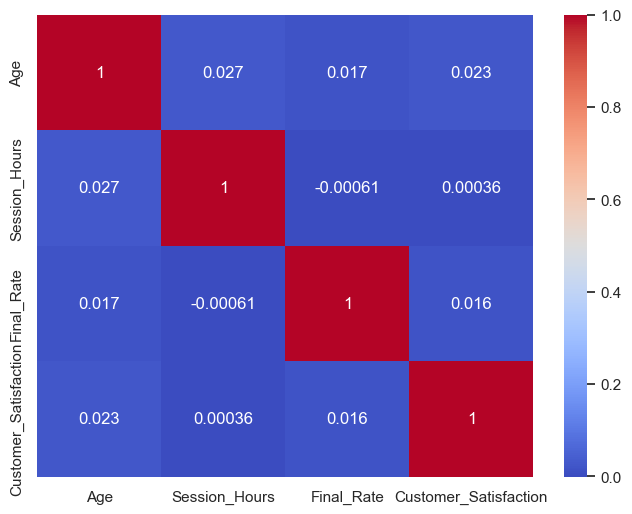

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


In [27]:
df.to_csv("../data/tattoo_studio_clean.csv", index=False)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2000 non-null   int64 
 1   Gender                 2000 non-null   object
 2   Day_of_Week            2000 non-null   object
 3   Session_Type           2000 non-null   object
 4   Tattoo_Size            2000 non-null   object
 5   Tattoo_Style           2000 non-null   object
 6   Artist_Name            2000 non-null   object
 7   Session_Hours          2000 non-null   int64 
 8   Final_Rate             2000 non-null   int64 
 9   Customer_Satisfaction  2000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 156.4+ KB
